# Assignment 2.2: Bandits

## Section 1: Theory Questions
No code is required for the following questions. However, if you choose to run any simulaion s to help you better understand certain settings, we encourage you to include them in the final solution. 


1.   For a given problem to solve, students can choose from one of the N
different hints. Each hint has some success probability of $\theta_n ∈ [0, 1]$ but it
is unknown to the students. Reward here is $1$ if the students can solve the
problem correctly after seeing one of the hints and $0$ otherwise. Provide
two examples of the kinds of information you would need to model this
problem as a contextual bandit problem?

2.   Greedy algorithms explore and exploit equally well. Is this statement True
or False? Provide reasoning for your choice.
3. $\epsilon$-greedy algorithm, can be used to improve the performance of vanilla
greedy approach (explore or exploit only) but can sometimes lead to resource waste (resource can be in terms of time, computation, and so on).
Provide an example of one such case with reasoning.
4. In Zürich, there are two popular training centres offering classes to prepare
candidates to pass a specific test. For the first training center, it has a
mean success reward of $0.8$ for $500$ classes that it offered. For the second
training center for another $500$ classes, the mean success reward is $0.6$. A
new training center opened recently has a success reward of $0.75$ for the
first 10 classes offered by it. Imagine you have a student who needs to
decide which training center to join. Ignoring all external factors, explain
why using greedy and ϵ-greedy (with a fixed ϵ) method may not be the
most optimum strategy. Can you think of a better strategy for the above
and explain your reasoning?
5. Rather than performing exploration or exploitation randomly or with a
pre defined probability, the Upper Confidence Bound (UCB) algorithm
adapts its exploration-exploitation balance as it gains more information
about the environment. UCB assigns the following value to each arm i at
each time t as $UCB_{i,t}=\mu_{i,t}+\sqrt{\frac{ln\,t}{n_{i,t}}}$. Explain the significance of the second term on the RHS.






Write Your Answers Here
1. 
  * The first example is: for different problems, the type of hints as well as the success probability of the hints are different. Thus the action and the reward for different problems (contexts) are different.
  * The second example is: for different students, the type of hints as well as the success probability of the hints are different. Thus the action and the reward for different students (contexts) are different.

2. The statement is False. The greedy algorithm always select the action with maximum average reward. Therefore, the probability of explore is zero and the probability of exploit is one.

3. For example, if the current best arm (hint) is the actual best arm (in terms of the optimal value function $q^*$). In this case, the exploration of other arms leads to reduandent computation. 

4. 
  * If we use greedy algorithm, we will mostly choose the first training center. But the sampler size of the new training center is too small, thus has higher uncertainty. It is possible that the new training center has higher reward if we can have more samples.
  * If we use $ϵ$ greedy  algorithm, the exploration is completely at random. Therefore, if we have bad luck, we will explore the second training center which is highly possible worse than the first training center. Besides, if we are not lucky, even though we choose the third center, if it always fails, then for exploit step we still choose first center only. 
  
  * A better strategy would be expore a training center with max mean reward plus the uncertainty of that center (we can model this term inverse proportional to the number of times that the arm is explored). It is better because the current optimal as well as the uncertainty is considered at the same time.

5. The second term formulates the uncertainty of the arm. If an arm is explored for less times, the second term would be large, thus this arm will have a higher probability of being choosen. This term will encourage we take actions that are not explored. 

## Section 2: Multi-Armed Bandits
Consider a scenario when students are preparing for an examination and
there are 5 different courses with different success rates. The environment is modelled as follows:

If the selection of the coursework is viewed as an experimental condition, then a good algorithm should direct more students to more effective conditions over time. Reward here
is passing the examination. Model the problem as a multi-arm bandit
problem and run two trials with 500 and 2000 simulation for:

In [ ]:
from random import random
class StaticCourse:
  def __init__(self):
    self.succ_prob=[0.1, 0.2, 0.4, 0.7, 0.9]
  def take_course(self, course_number):
    return random()<self.succ_prob[course_number]

We view the selection of the coursework as an experimental condition, and the result(pass/fail) as a 1/0 reward. This reward is recieved by calling the take_course method with the appropriate course number. 

A good algorithm should direct more students to more effective conditions over time. Reward here is passing the examination. Model the problem as a multi-arm bandit problem and run trials with 500 and 2000 simulation for:


1.   exploit-only approach
2.   explore-only approach
3.   ϵ-greedy with $ϵ ∈ \{0.1, 0.25, 0.5\}$
4.   Thomson Sampling with $α,β ∈ \{1, 50\}^2$ 

For each of the $9$ cases above, plot the following graphs:
1. Cumulative reward(ie the sum of all rewards obtained uptill now) vs Number of Steps
2. Average reward(ie the sum of all rewards obtained uptill now divided by the number of steps) vs Number of Steps

Explain, for all your plots, how one conclusions would differ if they could do only $500$ trials vs if they could do $2000$ trials. Also explain the effect of varying ϵ in ϵ-greedy and the effect of changing α and β in Thomson Sampling

While coding this part, keep in mind the following:

*   For ϵ-greedy, an ϵ value of 1 must be equivalent to explore-only and an ϵ value of $0$ mus be equivalent to exploit-only
*   You may choose to do the 500 trial and 2000 trial experiments simultaneously of separately, it is upto you.
*   It might make sense to repeat experiments multiple times and average out results
*   Try to pass the environment as a parameter to the experiments, it will make the next part a lot easier.




Answer:
* 500 trials has larger variance compared with 2000 trials (the average reward plot has strong fluctuations). For exploit-only, the average reward tends to converge to the first arm that has reward, since greedy algorithm will always select the first non-zero arm. For explore only, the algorithm will converge to the average reward of all possible arms. However, for both 500 and 2000 trials, the Thomson sampling has better performance compared with other methods, $ϵ$-greedy has better result compared with exploit-only and explore only approaches.

* $ϵ$ is the probability of explore. Larger $ϵ$ encourages more exploration, small $ϵ$ encourages more exploits. Therefore, it should be decreased as the number of iteration increases, since we want to explore more when there is uncertainty. 

*  $\alpha$ and $\beta$ are the parameters of the prior distribution Beta. For small $\alpha$ and $\beta$ the prior information is weak and with larger variance, the prior will be immediately updated in the first few iterations. For large $\alpha$ and $\beta$ the prior information is strong with smaller variance, the prior will be updated after the sample number goes larger. For unbalanced $\alpha$ and $\beta$, there is a prior believe that the distribution is more likely to draw a low success probability (for large beta) or a high success probability (for large alpha). 


In [ ]:
# Your code here. Feel free to create more cells if needed
import numpy as np
class Greedy:
  def __init__(self, size=5):
    self.size = size;
    self.total_reward = np.zeros(size)
    self.rounds = np.zeros(size)
  
  def get_action(self):
    theta_list = self.total_reward / self.rounds
    theta_list[np.argwhere(np.isnan(theta_list))] = 1
    return np.argmax(theta_list)

  def update(self, action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)

class Random:
  def __init__(self, size=5):
    self.size = size;
    self.total_reward = np.zeros(size)
    self.rounds = np.zeros(size)

  def get_action(self):
    return np.random.randint(self.size)

  def update(self, action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)

class EGreedy:
  def __init__(self, size=5, epsilon = 0.1):
    self.size = size;
    self.epsilon = epsilon
    self.total_reward = np.zeros(size)
    self.rounds = np.zeros(size)
  
  def get_action(self):
    if random() < self.epsilon:
      return np.random.randint(self.size)
    else:
      theta_list = self.total_reward / self.rounds
      theta_list[np.argwhere(np.isnan(theta_list))] = 1`
      return np.argmax(theta_list)

  def update(self, action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)

class Thompson:
  def __init__(self, size=5, alpha=1, beta=1):
    self.size = size
    self.alpha = np.ones(size) * alpha
    self.beta = np.ones(size) * beta
  
  def get_action(self):
    theta_list = []
    for i in range(self.size):
      theta_list.append(np.random.beta(a = self.alpha[i], b = self.beta[i]))
    return np.argmax(theta_list)
  
  def update(self, action, reward):
    self.alpha[action] += float(reward)
    self.beta[action] += float(1 - reward)


In [ ]:
from tqdm import tqdm
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

def run_av(policies, course):
  for policy in policies:
    all_rewards=[]
    for repeats in tqdm(range(100)):
      pl=policies[policy]
      cum_rew=[]
      for i in range(2000):
        act=pl.get_action()
        rew=course.take_course(act)
        pl.update(act,rew)
        if len(cum_rew)==0:
          cum_rew.append(int(rew))
        else:
          cum_rew.append(cum_rew[-1]*len(cum_rew)+rew)
          cum_rew[-1]/=len(cum_rew)
      all_rewards.append(cum_rew)
    rewards=[sum(x)/len(x) for x in zip(*all_rewards)]
    plt.plot(rewards, label=policy)
  plt.xlabel("# Steps")
  plt.ylabel("Average Reward")
  plt.legend()
  plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-30-f2d8cedfa577>:10: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-30-f2d8cedfa577>:42: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
100%|██████████| 100/100 [00:04<00:00, 22.10it/s]


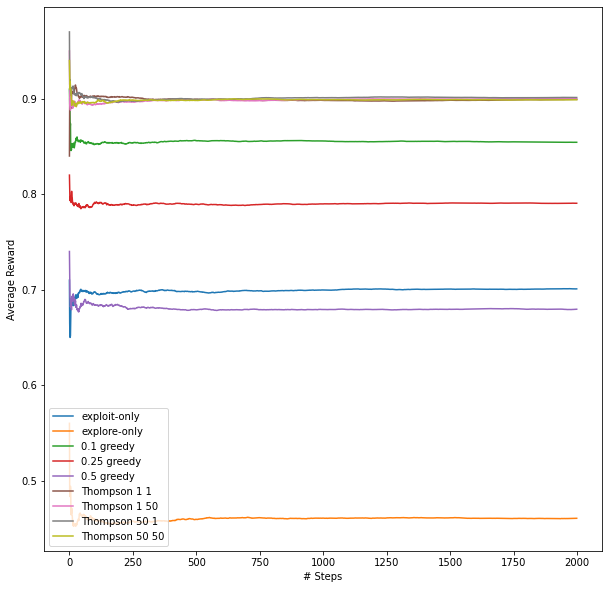

In [ ]:
course = StaticCourse()
policies = {
    "exploit-only":Greedy(len(course.succ_prob)),
    "explore-only":Random(len(course.succ_prob)),
    "0.1 greedy" : EGreedy(len(course.succ_prob), 0.1),
    "0.25 greedy" : EGreedy(len(course.succ_prob), 0.25),
    "0.5 greedy" : EGreedy(len(course.succ_prob), 0.5),
    "Thompson 1 1": Thompson(len(course.succ_prob), 1, 1),
    "Thompson 1 50": Thompson(len(course.succ_prob), 1, 50),
    "Thompson 50 1": Thompson(len(course.succ_prob), 50, 1),
    "Thompson 50 50": Thompson(len(course.succ_prob), 50, 50),
}
run_av(policies, course)

  0%|          | 0/2000 [00:00<?, ?it/s]<ipython-input-15-f2d8cedfa577>:10: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
100%|██████████| 2000/2000 [00:00<00:00, 52695.57it/s]


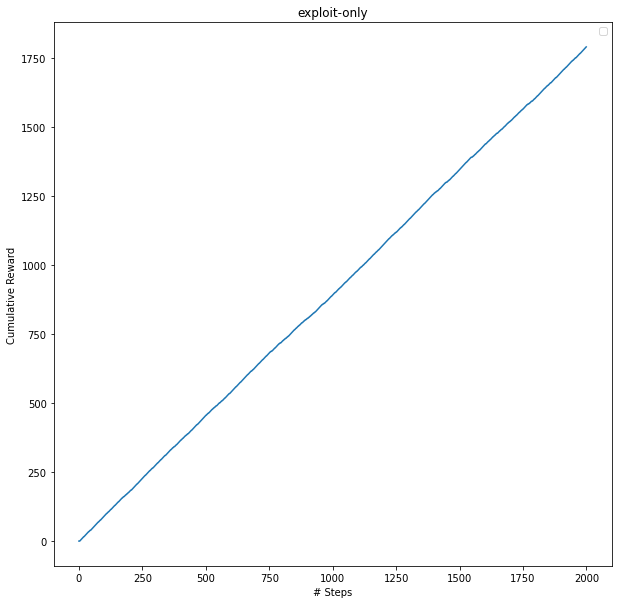

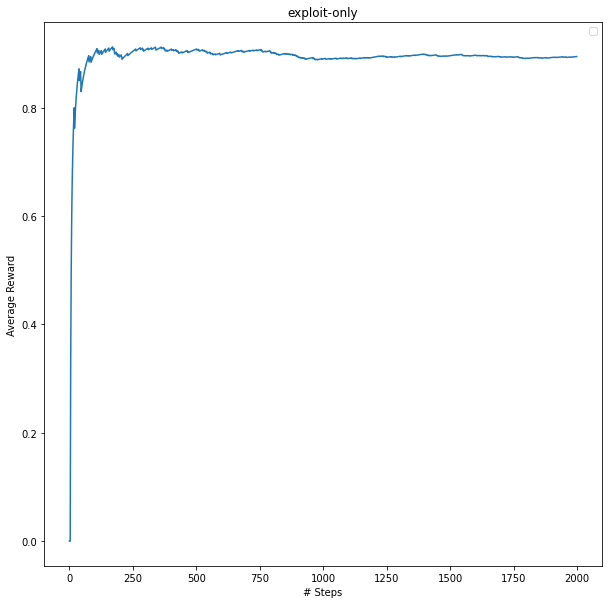

0.8945


100%|██████████| 2000/2000 [00:00<00:00, 101358.21it/s]


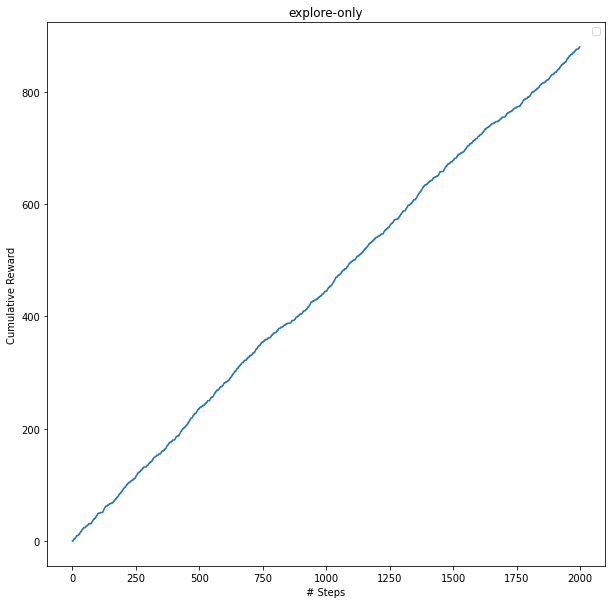

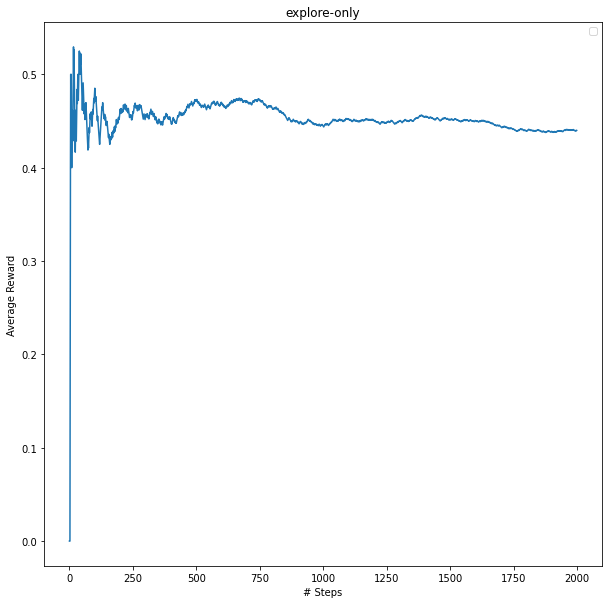

0.44


  0%|          | 0/2000 [00:00<?, ?it/s]<ipython-input-15-f2d8cedfa577>:42: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
100%|██████████| 2000/2000 [00:00<00:00, 41894.44it/s]


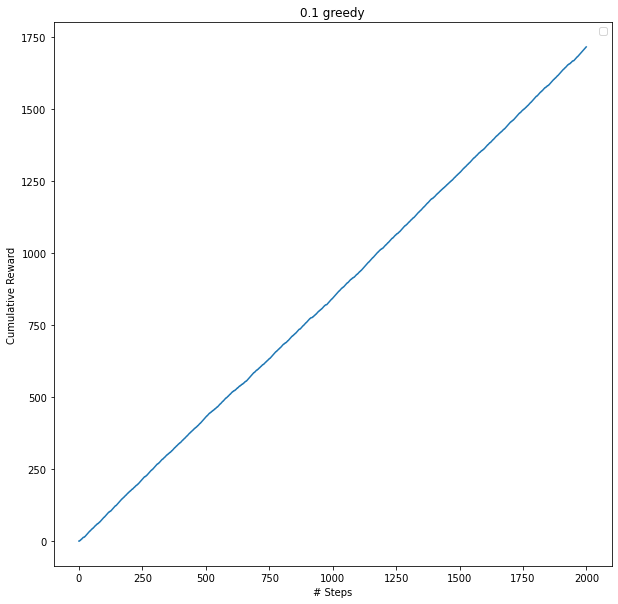

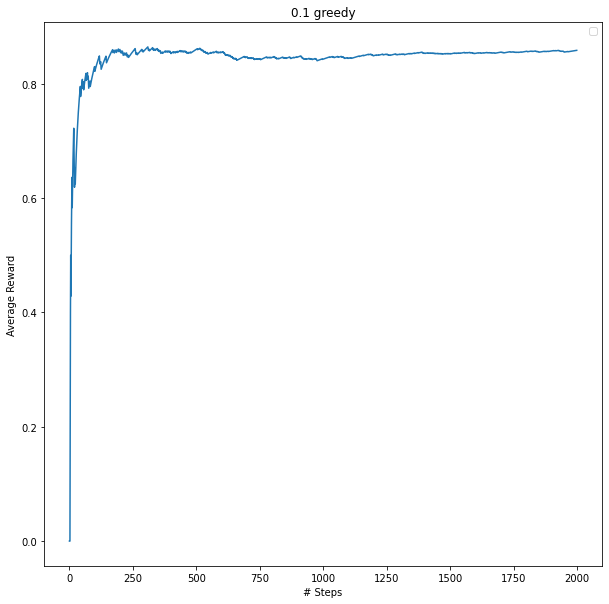

0.8585


100%|██████████| 2000/2000 [00:00<00:00, 46106.96it/s]


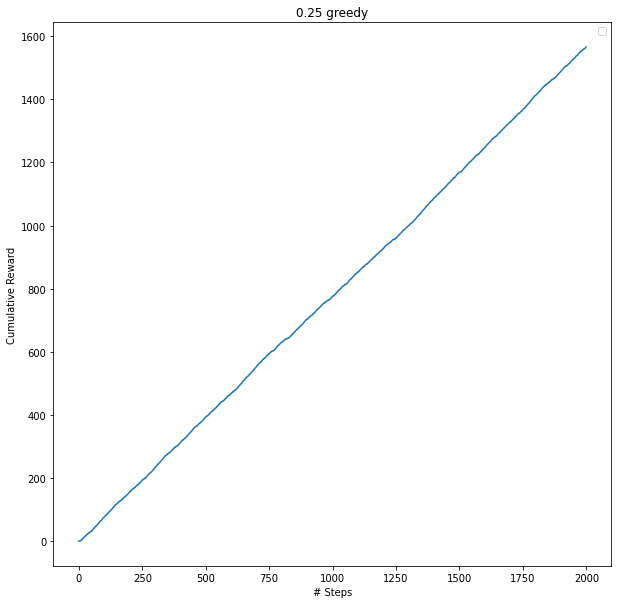

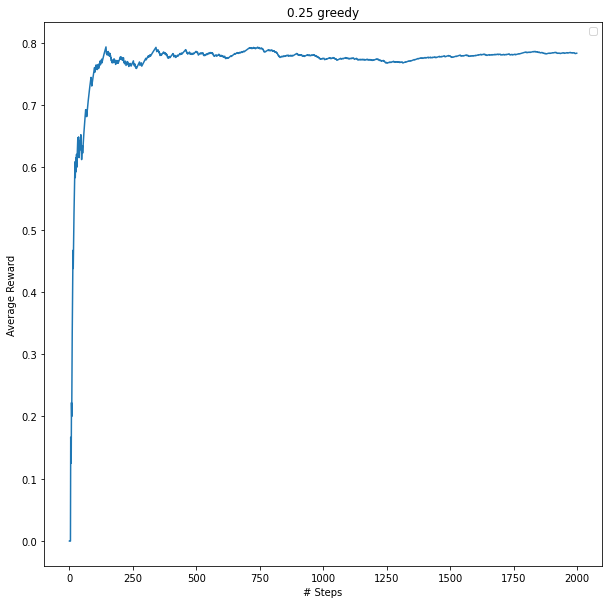

0.783


100%|██████████| 2000/2000 [00:00<00:00, 46161.26it/s]


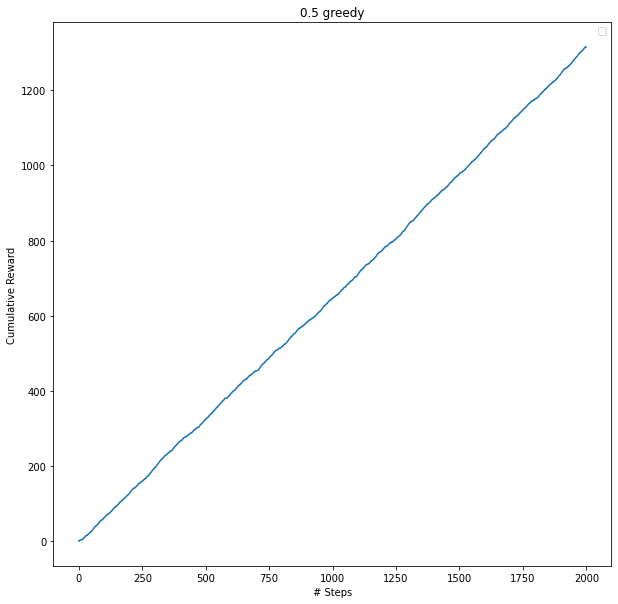

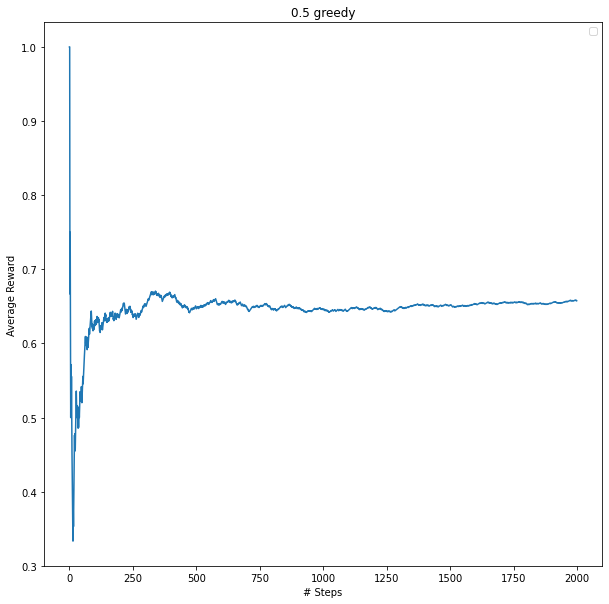

0.6575


100%|██████████| 2000/2000 [00:00<00:00, 35521.32it/s]


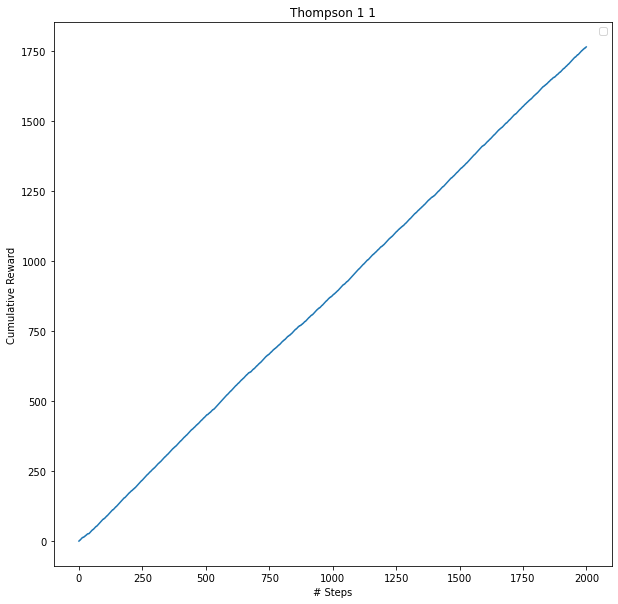

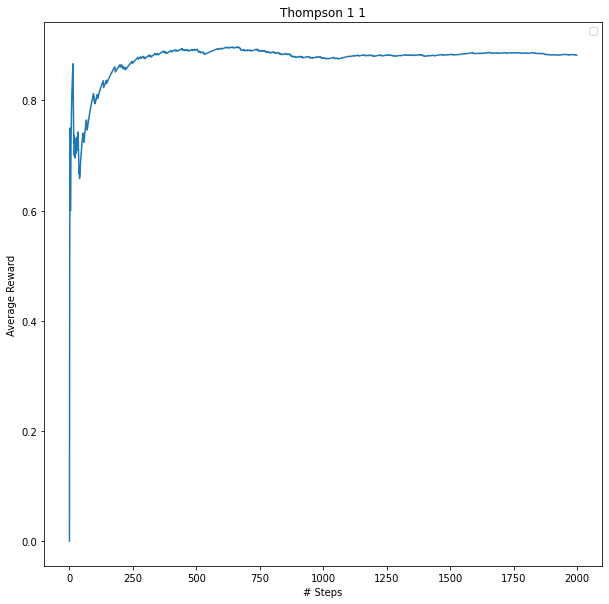

0.8825


100%|██████████| 2000/2000 [00:00<00:00, 36909.67it/s]


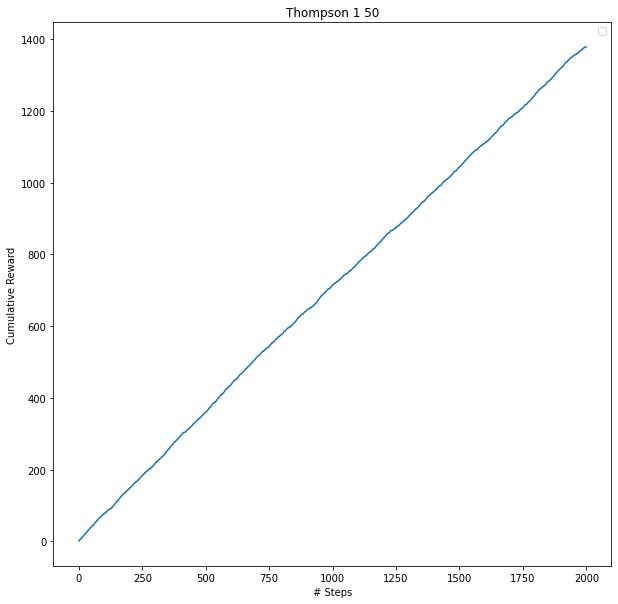

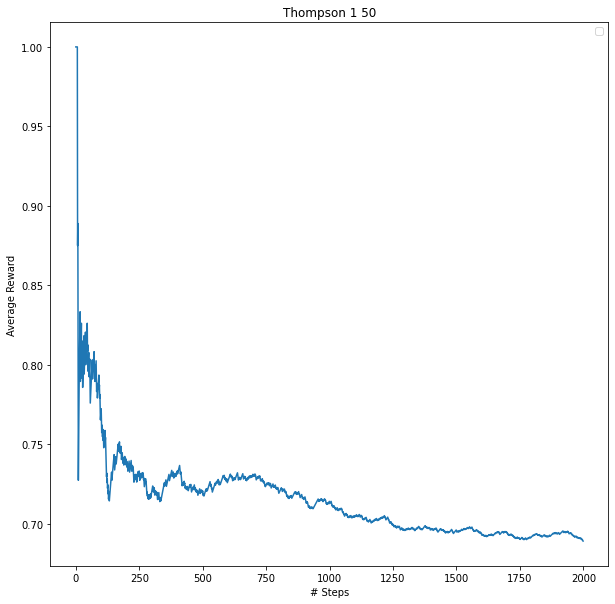

0.689


100%|██████████| 2000/2000 [00:00<00:00, 30332.51it/s]


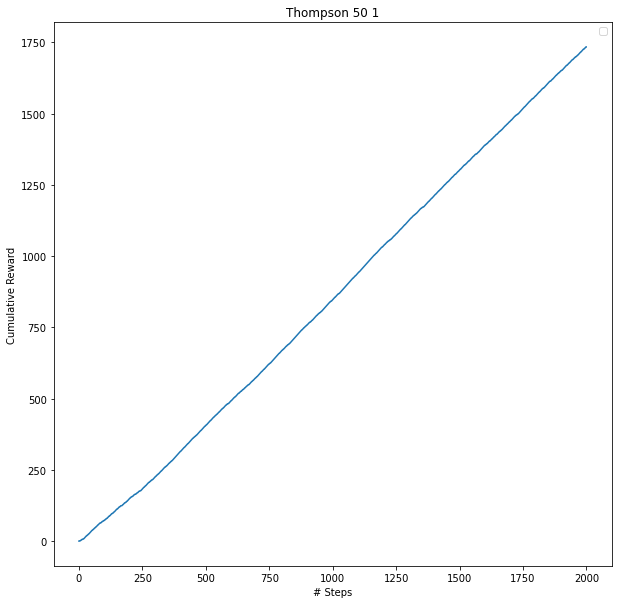

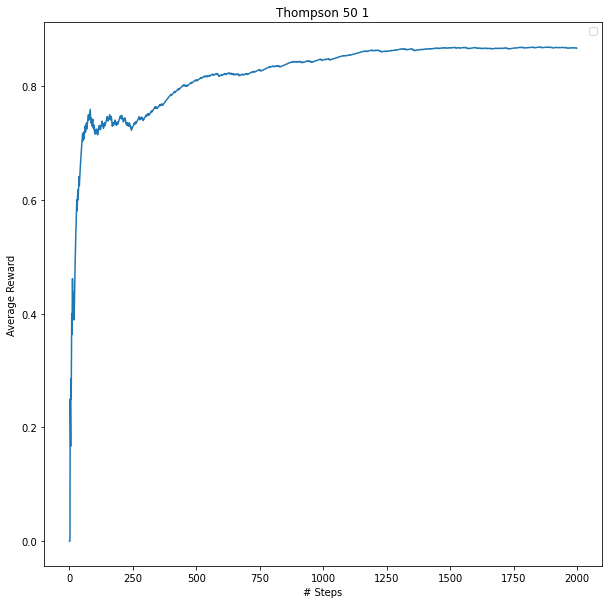

0.867


100%|██████████| 2000/2000 [00:00<00:00, 36269.57it/s]


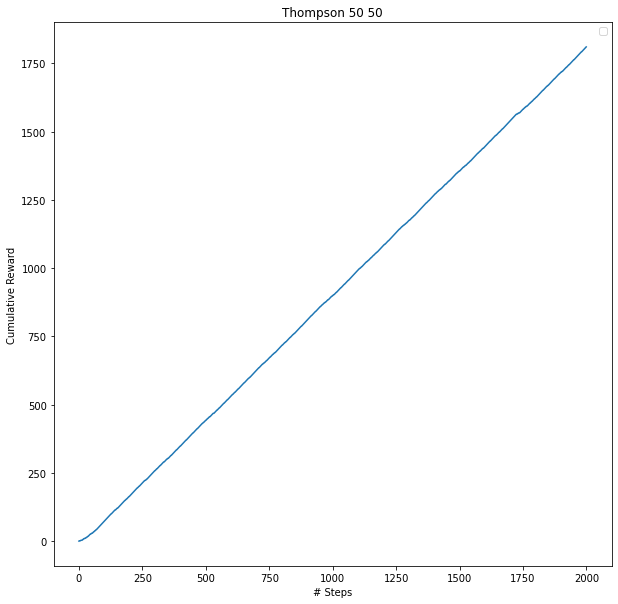

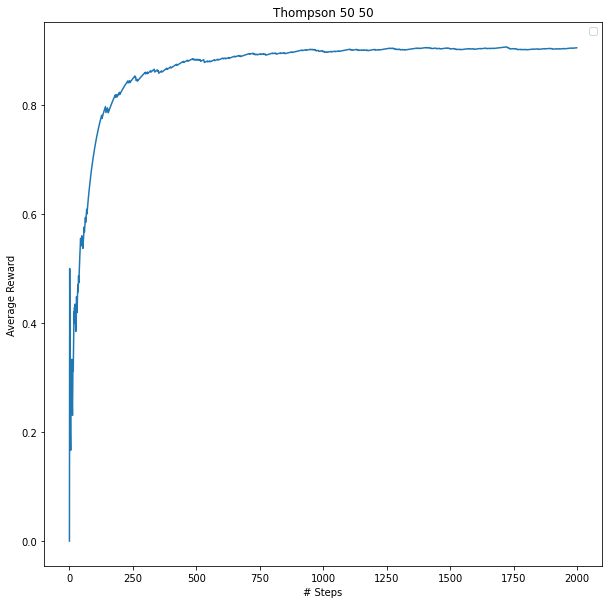

0.905


In [ ]:
from tqdm import tqdm
from matplotlib import pyplot as plt
course = StaticCourse()
strategies = [["exploit-only", Greedy(len(course.succ_prob))], ["explore-only",Random(len(course.succ_prob))], \
              ["0.1 greedy", EGreedy(len(course.succ_prob), 0.1)], ["0.25 greedy", EGreedy(len(course.succ_prob), 0.25)], ["0.5 greedy", EGreedy(len(course.succ_prob), 0.5)], \
              ["Thompson 1 1", Thompson(len(course.succ_prob), 1, 1)], ["Thompson 1 50", Thompson(len(course.succ_prob), 1, 50)], ["Thompson 50 1", Thompson(len(course.succ_prob), 50, 1)], ["Thompson 50 50", Thompson(len(course.succ_prob), 50, 50)]]

for strategy in strategies:
  cu_rewards=[]
  av_rewards=[]
  total_reward = 0
  for i in tqdm(range(2000)):
    action = strategy[1].get_action()
    reward = course.take_course(action)
    strategy[1].update(action, reward)
    total_reward += reward
    cu_rewards.append(total_reward)
    av_rewards.append(float(total_reward) / float(i + 1))

  plt.plot(cu_rewards)
  plt.xlabel("# Steps")
  plt.ylabel("Cumulative Reward")
  plt.legend()
  plt.title(strategy[0])
  plt.show()

  plt.plot(av_rewards)
  plt.xlabel("# Steps")
  plt.ylabel("Average Reward")
  plt.legend()
  plt.title(strategy[0])
  plt.show()
  print(av_rewards[-1])

Now answer the following questions:


6.   What do α and β signify in Thomson sampling? How does changing them affect the model?
7.   How does the ideal ϵ value change with number of steps? Can  you use this fact to develop a better ϵ-greedy algorithm?

Your answer here
Your answer here
6. $\alpha$ and $\beta$ are the parameters of the prior distribution Beta. For small $\alpha$ and $\beta$ the prior information is weak and with larger variance, the prior will be immediately updated in the first few iterations. For large $\alpha$ and $\beta$ the prior information is strong with smaller variance, the prior will be updated after the sample number goes larger. Higher variance will result in the larger uncertainty for arm selection and encourage more exploration. For unbalanced $\alpha$ and $\beta$, there is a prior believe that the distribution is more likely to draw a low success probability (for large beta) and the probability of chosing this arm is lower or a high success probability (for large alpha) and the probability of chosing this arm is higher.

7. $ϵ$ is the probability of explore. Larger $ϵ$ encourages more exploration, small $ϵ$ encourages more exploits. Therefore, it should be decreased as the number of iteration increases, since we want to explore more when there is uncertainty. Besides, this probability should be increased as the number of arms increases, and decreased as the variance among arms increases. Therefore, we define:
$$
  \epsilon_t = min\{1, {C*k \over t \Delta_{min}^2}\}
$$
, where $C$ is a constant, $k$ is the number of arms, t is the number of iterations, $\Delta_{min}$ is the minimum of mean reward difference among arms. 

While the above environment models some aspects of the real world, an important fact is still left out: in the real world rewards are not always stationary. In our example, a good portion of grading in a course is carried out by Teaching Assistants, who, unlike Professors, change frequently. This means that the pass-fail rates of courses might change as well. Below, we try to better model it:

In [ ]:
class DynamicCourse:
  def __init__(self):
    self.succ_prob=[0.1, 0.2, 0.4, 0.7, 0.9]
    # The probability that rewards will change in every try
    self.change_prob=0.01       
    # The maximum amount by which probabilities may change
    self.change_thresh=0.2
  def take_course(self, course_number):
    # shorthand to change success probability. change by randome amount within limits, then clip between 0 and 1
    change=lambda x:max(0,min(1,x-self.change_thresh+2*random()*self.change_thresh))
    if random()<self.change_prob:
      self.succ_prob=[change(x) for x in self.succ_prob]
    return random()<self.succ_prob[course_number]

Run trials with 2000 steps on this new environment with the following strategies:


1.   exploit-only approach
2.   explore-only approach
3.   The ϵ-greedy approach with the best final average reward from the last part
4.   The Thomson Sampling approach with the best final average reward from the last part
5.   The approach you came up with in $7$ above

Comment on how the performance of the algorithm changes. You may want to observe how the values of the rewards evolve over time as part of your analysis


In [ ]:
# Your code here
# Your code here
class SmartEGreedy:
  def __init__(self, size=5, C = 0.0001):
    self.size = size;
    self.total_reward = np.zeros(size)
    self.rounds = np.zeros(size)
    self.C = C
  
  def get_action(self):
    theta_list = self.total_reward / self.rounds
    theta_list[np.argwhere(np.isnan(theta_list))] = 1
    k = self.size
    t = np.sum(self.rounds)
    delta_min = np.diff(np.sort(theta_list)).min()
    
    denom = float(t * delta_min * delta_min)
    epsilon = min(1, self.C * k / denom) if denom > 0 else 1
    # print(epsilon)
    if random() < epsilon:
      return np.random.randint(self.size)
    else:
      return np.argmax(theta_list)

  def update(self, action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)


  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-30-f2d8cedfa577>:10: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-30-f2d8cedfa577>:42: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-20-2d8116bc1cf9>:11: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
100%|██████████| 100/100 [00:11<00:00,  8.99it/s]


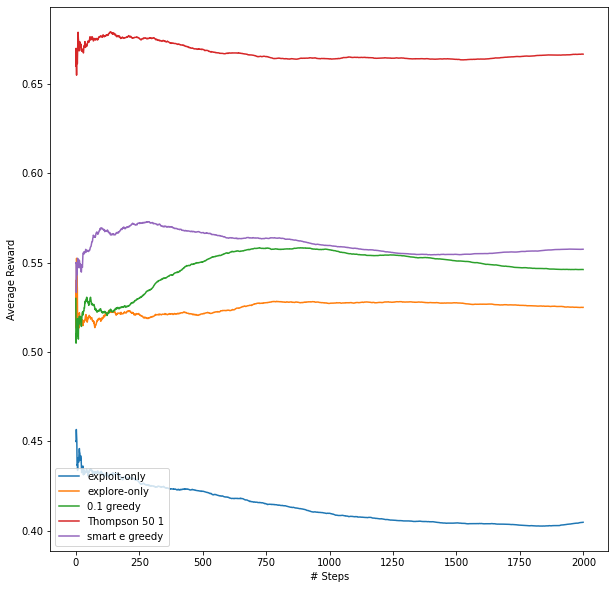

In [ ]:
course = DynamicCourse()
policies = {
    "exploit-only":Greedy(len(course.succ_prob)),
    "explore-only":Random(len(course.succ_prob)),
    "0.1 greedy" : EGreedy(len(course.succ_prob), 0.1),
    "Thompson 50 1": Thompson(len(course.succ_prob), 50, 1),
    "smart e greedy": SmartEGreedy(len(course.succ_prob))
}
run_av(policies, course)

Your analysis here
Your analysis here
* The exploit algorithm is more unstable and performs worse compared with stationary case, because the current maximum is possible to be changed. 

* The explore algorithm is more stable, because it simply chooses the actions randomly, and the result equals to the expectation of the rewards among the uniform distribution of all arms.

* The $\epsilon=0.1$-greedy and Thompson sampling with $\alpha = 50, \beta = 1$ has much worse performance compared with stationary case, because for stationary case the prior information is more reliable than the dynamic case. Since prior information is not important anymore, Thompson sampling algorithm has a decrease performance as iterations goes larger. However, Thompson sampling is still the best method among these five approaches.
 
* The updated ϵ-greedy algorithm does have better result in terms of the final average reward and the convergence curve compared with 0.1 greedy method. 


## Contextual Bandits
In this section, we try to deal with *Contextual Bandits*. These are Bandits in which, prior to taking an action, we observe a context in which to operate. One can think of this context as parts of the action space of a regular bandit, that is not under the control of the agent, or alternately, as the state of a Markov Decision Process which is not affected by previous actions.

In this question, we consider the following scenario. Sometime in the future, The AIED course at ETHZ decides to introduce exams, and you are a TA. The instructors and other TAs have prepared 4 sets of question papers, and each student is to be given one of these papers. It is upto you to decide who gets which paper. The Course broadly involves two skills, AI and Ed, and from the Tutorial performance, you have some idea of how good each student is in which subject. Being a Benevolent TA, you want to maximize the passing rate of students. Also, for some reason, students give the exam one-by-one.

More formally, the action space consists of 4 actions, $\mathcal{A}=\{0,1,2,3\}$ and the context consists of skill levels of the current student in each subject $\mathcal{C}=\{0,1,2\}\times\{0,1,2\}$. The reward is binary, you get $1$ reward if the student passes and $0$ otherwise.

The environment has been setup in a cython library, which we load in the following cell. We provide the `run` function that takes a single argument, a dictionary of maping policy names to classes, which provide two methods, `get_action(skill_1,skill_2)` which chooses the action given the context, and `update(skill_1,skill_2,action,reward)` which updates the internal state of the agent. In the rest of the exercise, you will implement various versions of this class 

In [ ]:
!rm *.so
!wget https://polybox.ethz.ch/index.php/s/Nr7lVkmItDmw8ud/download
!mv download "backend.so"
from backend import *
from tqdm import tqdm
from matplotlib import pyplot as plt
# create the bandit instance
cb=ContextualBandit(21950787)        # replace this with your studnt id without dashes
plt.rcParams['figure.figsize'] = [10, 10]

def run(policies):
  for policy in policies:
    all_rewards=[]
    for repeats in tqdm(range(100)):
      pl=policies[policy]()
      cum_rew=[]
      for i in range(5000):
        a,e=cb.next_context()
        act=pl.get_action(a,e)
        rew=cb.sample(act)
        pl.update(a,e,act,rew)
        if len(cum_rew)==0:
          cum_rew.append(int(rew))
        else:
          cum_rew.append(cum_rew[-1]*len(cum_rew)+rew)
          cum_rew[-1]/=len(cum_rew)
      all_rewards.append(cum_rew)
    rewards=[sum(x)/len(x) for x in zip(*all_rewards)]
    plt.plot(rewards, label=policy)
  plt.xlabel("# Steps")
  plt.ylabel("Average Reward")
  plt.legend()
  plt.show()

--2022-12-12 19:01:12--  https://polybox.ethz.ch/index.php/s/Nr7lVkmItDmw8ud/download
Resolving polybox.ethz.ch (polybox.ethz.ch)... 129.132.71.243
Connecting to polybox.ethz.ch (polybox.ethz.ch)|129.132.71.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319312 (312K) [application/x-sharedlib]
Saving to: ‘download’

download            100%[===================>] 311.83K   512KB/s    in 0.6s    

2022-12-12 19:01:14 (512 KB/s) - ‘download’ saved [319312/319312]



To begin with, implement the random strategy(which picks actions at random) and test the call the run function with it.

100%|██████████| 100/100 [00:05<00:00, 16.87it/s]


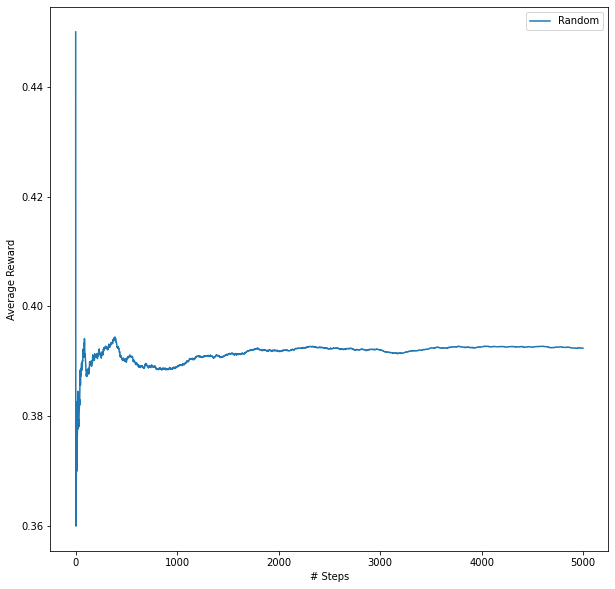

In [ ]:
# Edit this template
import numpy as np
class RandomPolicy:
  def __init__(self):
    self.size = 4;
    self.total_reward = np.zeros(4)
    self.rounds = np.zeros(4)
  def get_action(self,a,e):
    return np.random.randint(self.size)
  def update(self,a,e,action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)
run({"Random":RandomPolicy})

### Ignoring the Context
As a first attempt, we ignore the context completely, and attempt to find an overall good action.

Implement and compare the following algorithms:

1.   Greedy(exploit only)
2.   ϵ-greedy with ϵ=0.2
3.   Upper Confidence Bound with c=1

For the greedy algorithms, assume that expected reward is  1  if the current action has not yet been tried

In [ ]:
# Edit this template
class Greedy:
  def __init__(self):
    self.size = 4;
    self.total_reward = np.zeros(4)
    self.rounds = np.zeros(4)
  def get_action(self,a,e):
    theta_list = self.total_reward / self.rounds
    theta_list[np.argwhere(np.isnan(theta_list))] = 1
    return np.argmax(theta_list)
  def update(self,a,e,action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)
class epsGreedy:
  def __init__(self):
    self.size = 4;
    self.epsilon = 0.2
    self.total_reward = np.zeros(4)
    self.rounds = np.zeros(4)
  def get_action(self,a,e):
    if random() < self.epsilon:
      return np.random.randint(self.size)
    else:
      theta_list = self.total_reward / self.rounds
      theta_list[np.argwhere(np.isnan(theta_list))] = 1
      return np.argmax(theta_list)
  def update(self,a,e,action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)
class UCB:
  def __init__(self):
    self.size = 4;
    self.c = 1
    self.total_reward = np.zeros(4)
    self.rounds = np.zeros(4)
  def get_action(self,a,e):
    t = np.sum(self.rounds)
    theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
    theta_list[np.argwhere(np.isnan(theta_list))] = np.inf
    return np.argmax(theta_list)
  def update(self,a,e,action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)

### A Separate Policy for Each Context
Perhaps the simplest way of including the context in the policy is to train a separate policy for each of the 9 possible contexts. In the following cell, re-implement each of the 3 policies implemented earlier to have different memories for each context

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-dce5bca5e756>:8: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-dce5bca5e756>:24: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: divide by zero encountered in log
  theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: invalid value encountered in sqrt
  theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: divide by z

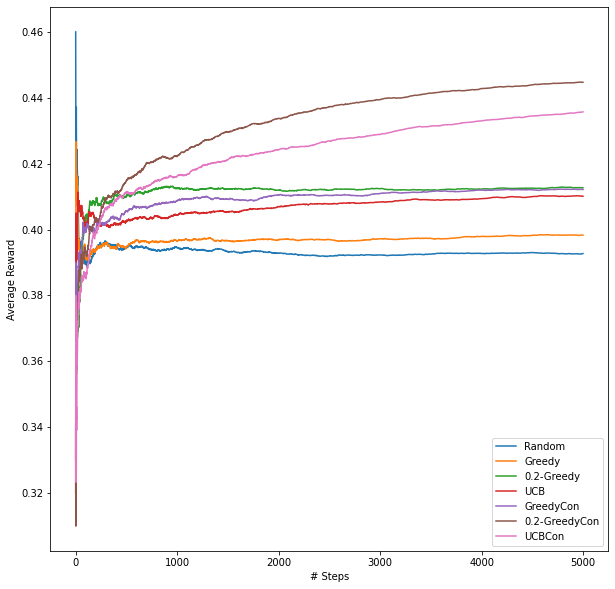

In [ ]:
# Edit this template
class GreedyCon:
  def __init__(self):
    self.model_list = [Greedy(), Greedy(), Greedy(), Greedy(), Greedy(), Greedy(), Greedy(), Greedy(), Greedy()]
  def get_action(self,a,e):
    return self.model_list[a + 3 * e].get_action(a, e)
  def update(self,a,e,action,reward):
    self.model_list[a + 3 * e].update(a, e, action, reward)

class epsGreedyCon:
  def __init__(self):
    self.model_list = [epsGreedy(), epsGreedy(), epsGreedy(), epsGreedy(), epsGreedy(), epsGreedy(), epsGreedy(), epsGreedy(), epsGreedy()]
  def get_action(self,a,e):
    return self.model_list[a + 3 * e].get_action(a, e)
  def update(self,a,e,action,reward):
    self.model_list[a + 3 * e].update(a, e, action, reward)
     
class UCBCon:
  def __init__(self):
    self.model_list = [UCB(), UCB(), UCB(), UCB(), UCB(), UCB(), UCB(), UCB(), UCB()]
  def get_action(self,a,e):
    return self.model_list[a + 3 * e].get_action(a, e)
  def update(self,a,e,action,reward):
    self.model_list[a + 3 * e].update(a, e, action, reward)
run({"Random":RandomPolicy,"Greedy":Greedy, "0.2-Greedy":epsGreedy,"UCB":UCB,"GreedyCon":GreedyCon,"0.2-GreedyCon":epsGreedyCon,"UCBCon":UCBCon})

8. Analyse the graph obtained. Based on the results, can you guess how the rewards are decided internally? (Bonus) Can you improve on the performance?

Note: The environment in the backend is stationary, ie rewards do not change with time.

Answer:
* As shown in the figure, methods with contextual awareness performance better than other methods. And generally, the performance order is 0.2 Greedy > UCB > Random > Greedy. 
* For the reward generation, different students with different skill level (AI or Education), the reward is different even for the same action. The method with UCB is worse than 0.2 greedy but better than greedy. However, when the iteration is less than 500, the performance of UCB is better than greedy, therefore, we can use piecewise trick (use UCB when t < 500, use greedy when t > 500) to improve the model. Besides, we can utilizes the time information to change the epsilon. 

In [ ]:
# Your code here
# Your code here
class SmartEGreedy:
  def __init__(self, size=5, C = 0.0001):
    self.size = size;
    self.total_reward = np.zeros(size)
    self.rounds = np.zeros(size)
    self.C = C
  
  def get_action(self):
    theta_list = self.total_reward / self.rounds
    theta_list[np.argwhere(np.isnan(theta_list))] = 1
    k = self.size
    t = np.sum(self.rounds)
    delta_min = np.diff(np.sort(theta_list)).min()
    
    denom = float(t * delta_min * delta_min)
    epsilon = min(1, self.C * k / denom) if denom > 0 else 1
    # print(epsilon)
    if random() < epsilon:
      return np.random.randint(self.size)
    else:
      return np.argmax(theta_list)

  def update(self, action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)


class epsSmartGreedy:
  def __init__(self):
    self.size = 4;
    self.total_reward = np.zeros(4)
    self.rounds = np.zeros(4)
    self.C = 0.0001
  def get_action(self,a,e):
    theta_list = self.total_reward / self.rounds
    theta_list[np.argwhere(np.isnan(theta_list))] = 1
    k = self.size
    t = np.sum(self.rounds)
    delta_min = np.diff(np.sort(theta_list)).min()
    
    denom = float(t * delta_min * delta_min)
    epsilon = min(1, self.C * k / denom) if denom > 0 else 1

    if random() < epsilon:
      return np.random.randint(self.size)
    else:
      return np.argmax(theta_list)
  def update(self,a,e,action,reward):
    self.rounds[action] += 1
    self.total_reward[action] += float(reward)

class epsSmartGreedyCon:
  def __init__(self):
    self.model_list = [epsSmartGreedy(), epsSmartGreedy(), epsSmartGreedy(), epsSmartGreedy(), epsSmartGreedy(), epsSmartGreedy(), epsSmartGreedy(), epsSmartGreedy(), epsSmartGreedy()]
  def get_action(self,a,e):
    return self.model_list[a + 3 * e].get_action(a, e)
  def update(self,a,e,action,reward):
    self.model_list[a + 3 * e].update(a, e, action, reward)

class piecewiseCon:
  def __init__(self):
    self.UCB = UCBCon()
    self.epsGreedy = epsSmartGreedyCon()
    self.t = 0
  def get_action(self,a,e):
    if self.t < 500:
      return self.UCB.get_action(a, e)
    else:
      return self.epsGreedy.get_action(a, e)
  def update(self,a,e,action,reward):
    self.t += 1
    self.UCB.update(a, e, action, reward)
    self.epsGreedy.update(a, e, action, reward)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: divide by zero encountered in log
  theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: invalid value encountered in sqrt
  theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
<ipython-input-24-dce5bca5e756>:38: RuntimeWarning: divide by zero encountered in true_divide
  theta_list = self.total_reward / self.rounds +  self.c * np.sqrt(np.log(t) / self.rounds)
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-24-dce5bca5e756>:24: RuntimeWarning: invalid value encountered in true_divide
  theta_list = self.total_reward / self.rounds
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-3

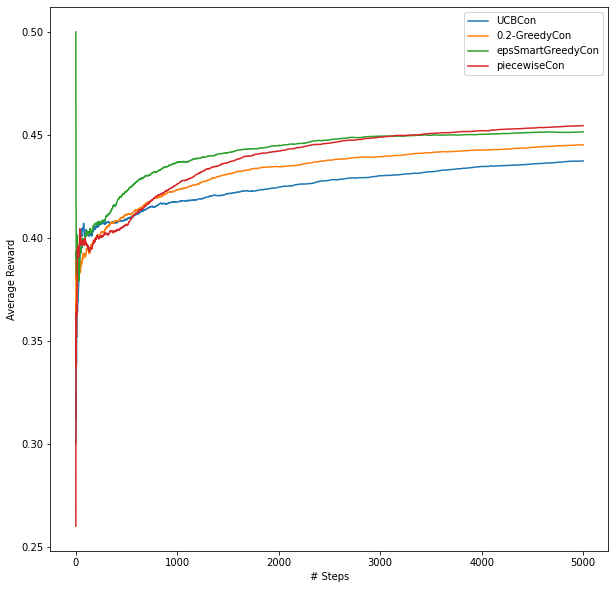

In [ ]:
run({"UCBCon":UCBCon, "0.2-GreedyCon":epsGreedyCon, "epsSmartGreedyCon":epsSmartGreedyCon, "piecewiseCon":piecewiseCon})